In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')

from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('responses.csv')

In [3]:
columns = ['date', 'gender', 'age', 'education', 'occupation', 'family_income', 'residence', 'medium_social_traditional', 
              'traditional_media_device', 'social_media_sites', 'accounts_count', 'spending_hours', 'social_media_glance', 'addiction',
              'most_attracted_media', 'purpose_using', 'usual_ranking', 'purchasing', 'product_purchase_type', 'brand_following',
              'frequent_purchase_type', 'appealing_feature', 'feature_help_brand', 'info_search_feasibility', 'influence_try_new_brands',
              'trusting_brand', 'comm_reliable', 'comm_credible', 'comm_attractive', 'comm_desirable', 'comm_memorable',
              'imp_updates', 'decision_making', 'rele_info_purchase_preference', 'consumer_attention', 'imp_brand_build',
              'response', 'ads_new_brands', 'promote_brands_aware', 'percept_position', 'target_audience', 'brand_avail_purchase',
              'brand_engaging', 'feedback', 'recommed', 'suggestion']
df.columns = columns

In [4]:
def encode_decode(my_df, series_name, choice):
    arr_name = np.array(list(my_df[str(series_name)]))
    le = LabelEncoder()
    enc_res = le.fit_transform(arr_name)
    rev_res = le.inverse_transform(enc_res)
    if choice == 0:
        res = enc_res
    if choice == 1:
        res = rev_res
    return res

In [5]:
df.drop(columns=['suggestion'], axis=1, inplace=True)

In [6]:
dummy_cols = ['date']
orig_cols = list(df.columns)
for col in range(len(orig_cols)):
    if orig_cols[col] != 'date':
        dummy_cols.append(str(orig_cols[col] + '_' + str(col)))
df.columns = dummy_cols
df.head()

,date,gender_1,age_2,education_3,occupation_4,family_income_5,residence_6,medium_social_traditional_7,traditional_media_device_8,social_media_sites_9,...,imp_brand_build_35,response_36,ads_new_brands_37,promote_brands_aware_38,percept_position_39,target_audience_40,brand_avail_purchase_41,brand_engaging_42,feedback_43,recommed_44
0,2/22/2019 20:52:00,Female,36 - 40 years,Ph. D,Government Employee,10001 - 20000,Riyadh,Online Media (Social Media),Television,Smart Phone,...,Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Yes,Yes
1,2/22/2019 20:53:45,Female,21 - 25 years,Under graduate,Businesswoman / Entrepreneur,40001 - 50000,Riyadh,"Traditional Media (TV, Radio, Newspapers, Maga...","Television, Radio, Magzine, Newspaper",Smart Phone,...,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree
2,2/23/2019 14:31:40,Female,21 - 25 years,Under graduate,Student,20001 - 30000,Tabuk,Online Media (Social Media),Television,Smart Phone,...,Strongly Disagree,Neither Agree Nor Disagree,Neither Agree Nor Disagree,Strongly Agree,Strongly Disagree,Neither Agree Nor Disagree,Strongly Disagree,Neither Agree Nor Disagree,Yes,No
3,2/23/2019 14:35:28,Female,21 - 25 years,Under graduate,Student,10001 - 20000,Riyadh,Online Media (Social Media),Television,Smart Phone,...,Strongly Agree,Agree,Strongly Agree,Strongly Disagree,Neither Agree Nor Disagree,Neither Agree Nor Disagree,Neither Agree Nor Disagree,Agree,No,Yes
4,2/23/2019 14:37:31,Female,21 - 25 years,Under graduate,Student,20001 - 30000,Tabuk,Online Media (Social Media),Television,Smart Phone,...,Agree,Strongly Agree,Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Yes,Yes


# H1: The increased usage of social media has resulted in completely avoiding the traditional media.

In [7]:
h1_df = df[['gender_1', 'age_2', 'medium_social_traditional_7', 'traditional_media_device_8', 'social_media_sites_9']]

Let us consider the sample of the data where it focuses on the usage of which type of media.  

In [8]:
ST_media = h1_df['medium_social_traditional_7'].value_counts().to_frame()
ST_media.reset_index(inplace=True)
ST_media.columns = ['medium', 'count']
ST_media.set_index('medium', inplace=True)
ST_media.index = ['Social Media', 'Traditional Media']
ST_media

,count
Social Media,133
Traditional Media,13


The above table shows that `Social Media` platform is heavily preferred than `Trditional Media`.

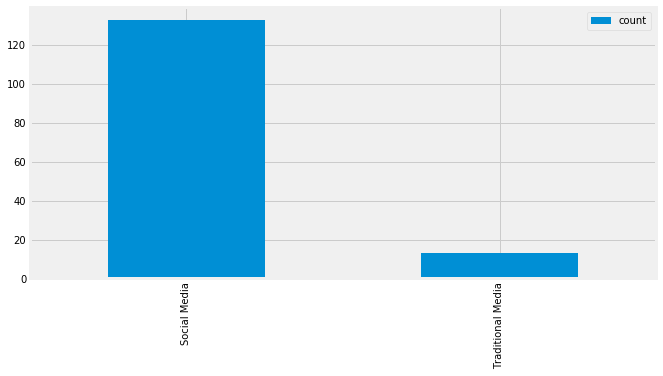

In [9]:
ST_media.plot(kind='bar', figsize=(10, 5))

This clearly shows that majority of the people use `Social Media` than `Traditional Media` which resulted in avoiding of the `Traditional Media`.

Let us highlight the habit of `Social Media` users if at all they want to use `Traditional Media`, which medium they will prefer the most.

In [10]:
SM = h1_df[h1_df['medium_social_traditional_7'] == 'Online Media (Social Media)']
STM = SM['traditional_media_device_8'].value_counts().to_frame()
STM.reset_index(inplace=True)
STM.columns = ['medium', 'count']
STM.set_index('medium', inplace=True)
STM.index = ['T', 'R', 'TRN', 'N', 'TR', 'TN', 'TM']
STM

,count
T,115
R,5
TRN,3
N,3
TR,3
TN,2
TM,2


The above table shows the `Traditional Media` medium for the users who had preferred `Social Media`.

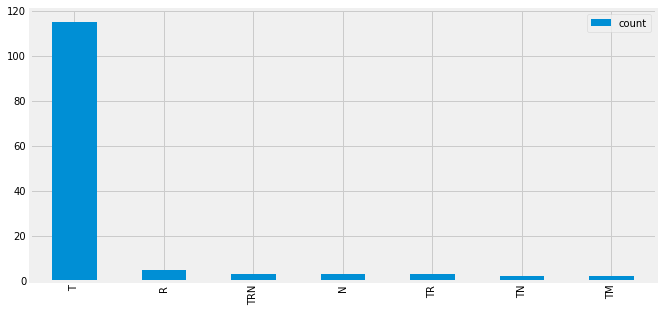

In [11]:
STM.plot(kind='bar', figsize=(10, 5))

Hence we can conclude that `Social Media` users perfer `Television` medium for using `Traditional Media`. And very less `Social Media` users use `Television Magazine`.

In [12]:
TM_alone = h1_df[h1_df['medium_social_traditional_7'] != 'Online Media (Social Media)']
TM_age_grps = TM_alone['age_2'].value_counts().to_frame()
TM_age_grps.reset_index(inplace=True)
TM_age_grps.columns = ['age', 'count']
TM_age_grps

,age,count
0,21 - 25 years,5
1,31 - 35 years,4
2,26 - 30 years,2
3,Below 21 years,2


The above table shows the age groups of the people who use `Traditional Media` other than `Social Media`. There are totally `5` women in the age group of `21 - 25 years`. On the whole, there are `13` women who prefer `Traditional Media`.

**Conclusion:**

From the above results we can say that
1. Majority of the people prefer to use `Social Media` than `Traditional Media` and there are very few who prefer `Traditional Media` alone.
2. There are also people who use not only use `Social Media` but also use `Traditional Media`. After sampling we have found that majority of the `Social Media` users prefer `Television` as their medium.

Hence we can conclude that the increased usage of social media has **majorly** resulted in avoiding the traditional media